### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('data.csv')
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

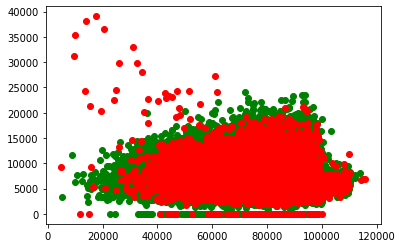

In [41]:
plt.scatter(data[data['IsBadBuy']==0]['VehOdo'], data[data['IsBadBuy']==0]['MMRCurrentRetailAveragePrice'],c='g')
plt.scatter(data[data['IsBadBuy']==1]['VehOdo'], data[data['IsBadBuy']==1]['MMRCurrentRetailAveragePrice'],c='r')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [42]:
from sklearn import *

In [43]:
model1 = linear_model.LinearRegression()

In [44]:
type(model1)

sklearn.linear_model._base.LinearRegression

In [56]:
trainN, testN = 5000, 1000
trainSet = data.loc[:trainN, ['VehOdo', 'MMRCurrentRetailAveragePrice', 'IsBadBuy']]

In [57]:
trainSet.dropna(inplace=True)
trainSet.head(10)
print(len(trainSet))

4984


In [58]:
testSet = data.loc[-testN:, ['VehOdo', 'MMRCurrentRetailAveragePrice', 'IsBadBuy']]
testSet.dropna(inplace=True)
testSet.tail()

,VehOdo,MMRCurrentRetailAveragePrice,IsBadBuy
72978,45234,4836.0,1
72979,71759,10151.0,0
72980,88500,11831.0,0
72981,79554,10099.0,0
72982,66855,11954.0,0


In [59]:
trainX = trainSet[['VehOdo', 'MMRCurrentRetailAveragePrice']]
trainY = trainSet['IsBadBuy']

In [60]:
testX = testSet[['VehOdo', 'MMRCurrentRetailAveragePrice']]
testY = testSet['IsBadBuy']

In [51]:
model1.fit(trainX, trainY)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [52]:
prediction = model1.predict(trainX)

In [89]:
print(prediction)

[0.11411761 0.12325544 0.15414946 ... 0.11566444 0.19812527 0.22276003]


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [53]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [71]:
target_names = ['class 0', 'class 1']
print(metrics.classification_report(trainY, predictionClass, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      1.00      0.93      4351
     class 1       0.00      0.00      0.00       633

    accuracy                           0.87      4984
   macro avg       0.44      0.50      0.47      4984
weighted avg       0.76      0.87      0.81      4984



/home/yukatan/ml/jupyterenvironment/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yukatan/ml/jupyterenvironment/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yukatan/ml/jupyterenvironment/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [72]:
print(metrics.confusion_matrix(trainY, predictionClass))

[[4351    0]
 [ 633    0]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [76]:
modelTree = tree.DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [84]:
modelTree.fit(trainX, trainY)
treePrediction = modelTree.predict_proba(trainX)
print(treePrediction)

[[0.82352941 0.17647059]
 [0.82352941 0.17647059]
 [0.82272727 0.17727273]
 ...
 [0.93       0.07      ]
 [1.         0.        ]
 [0.         1.        ]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [98]:
treePredClass = [1 if pair[1] > 0.5 else 0 for pair in treePrediction]

In [99]:
print(len(trainY))

4984


In [100]:
print(len(treePredClass))

4984


In [101]:
target_names = ['class 0', 'class 1']
print(metrics.classification_report(trainY, treePredClass, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98      4351
     class 1       1.00      0.69      0.82       633

    accuracy                           0.96      4984
   macro avg       0.98      0.85      0.90      4984
weighted avg       0.96      0.96      0.96      4984



In [103]:
print(metrics.confusion_matrix(trainY, treePredClass))

[[4349    2]
 [ 195  438]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [72]:
# место для кода

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [73]:
# место для кода

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [74]:
# место для кода

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [75]:
# место для кода